In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# IMF Growth
df_imf_growth = pd.read_excel("./Data/Growth_IMF.xls")

In [3]:
data = df_imf_growth[df_imf_growth["Real GDP growth (Annual percent change)"] == "Singapore"]

In [4]:
data = data.drop("Real GDP growth (Annual percent change)",axis=1)
data

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
155,10.1,10.8,7.1,8.6,8.8,-0.6,1.3,10.8,11.3,10.2,...,1.3,-3.9,8.9,3.6,1,2.1,2.5,2.5,2.5,2.5


In [5]:
data.columns

Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027,
       2028],
      dtype='object')

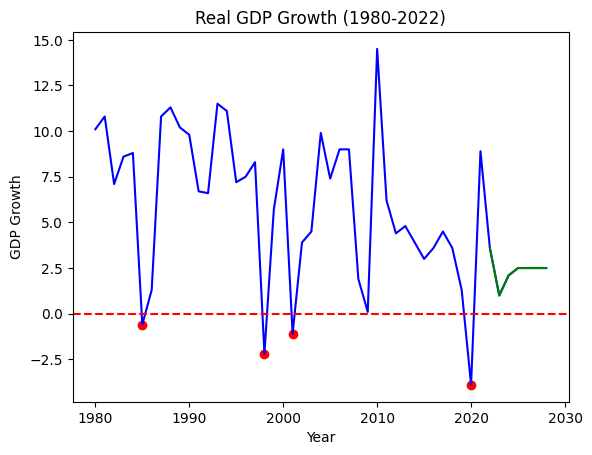

In [6]:
import matplotlib.pyplot as plt

x = list(data.columns)  
y = data.iloc[0].tolist()  

negative_indices = [i for i, value in enumerate(y) if value < 0]

# Plot circles at the points where y is less than 0 and add text labels
x_negative = [x[i] for i in negative_indices]
y_negative = [y[i] for i in negative_indices]

# Create a single line plot for the entire dataset
plt.plot(x, y, color='blue', label='Line')

# Plot circles at the points where y is less than 0 and add text labels
plt.scatter(x_negative, y_negative, color='red', marker='o')

# Add a horizontal line at y=0
plt.axhline(0, color='red', linestyle='--')

# Create a line plot for x > 2022 with a different style (green)
x_index = x.index(2022)
plt.plot(x[x_index:], y[x_index:], color='green', label='Line (x > 2022)')

# Add labels and a title
plt.xlabel('Year')
plt.ylabel('GDP Growth')
plt.title('Real GDP Growth (1980-2022)')

# Display the plot
plt.savefig('gdp_growth.png',transparent=True)
plt.show()

In [7]:
ind_df = pd.read_excel("./Data/Singapore_Industry.xlsx")

In [8]:
ind_df = ind_df.dropna()

In [9]:
Goods_Producing_Industries = ind_df.iloc[0:3].reset_index(drop=True)

In [10]:
Service_Industries= ind_df.iloc[4:-1].reset_index(drop=True)

In [11]:
Goods_Producing_Industries

,Data Series,2022,2021,2020,2019,2018,2017,2016,2015,2014,...,1969,1968,1967,1966,1965,1964,1963,1962,1961,1960
0,Manufacturing,21.6,22.0,20.7,20.4,21.9,19.8,18.6,19.2,19.0,...,17.1,15.9,15.2,14.9,14.3,13.5,12.2,11.3,10.9,11.2
1,Construction,2.7,2.6,2.4,3.7,3.7,4.0,4.8,5.1,5.1,...,5.9,6,5.6,5.6,6.3,5.8,4.8,4.3,4.2,3.3
2,Utilities,1.1,1.2,1.4,1.2,1.2,1.2,1.4,1.5,1.4,...,3,3.3,3.3,3,2.9,3.1,2.7,2.9,2.7,2.8


In [79]:
Service_Industries = Service_Industries.sort_values(by=["2022 "],ascending=True).reset_index(drop=True)
Goods_Producing_Industries = Goods_Producing_Industries.sort_values(by=["2022 "],ascending=True).reset_index(drop=True)

In [80]:
Goods_Producing_Industries['2022 ']

0     1.1
1     2.7
2    21.6
Name: 2022 , dtype: float64

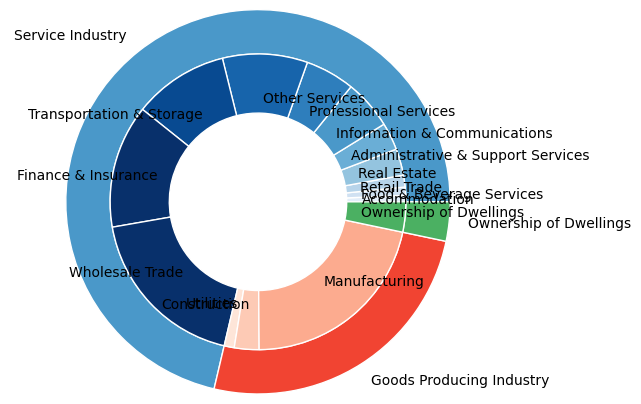

In [81]:
# Libraries
import matplotlib.pyplot as plt
 
# Make data: I have 3 groups and 7 subgroups
group_names=["Service Industry", "Goods Producing Industry", "Ownership of Dwellings"]
group_size=[Service_Industries['2022 '].sum(), Goods_Producing_Industries['2022 '].sum(), ind_df['2022 '][20]]
subgroup_names_raw = Service_Industries['Data Series'].tolist()
subgroup_names_raw.extend(Goods_Producing_Industries['Data Series'].tolist())
subgroup_names_raw.append("Ownership of Dwellings")
supgroup_names = []
for name in subgroup_names_raw:
    supgroup_names.append(name.strip())
subgroup_size=[]
subgroup_size = Service_Industries['2022 '].tolist()
subgroup_size.extend(Goods_Producing_Industries['2022 '].tolist())
subgroup_size.append(ind_df['2022 '][20])

 
# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), b(0.6), c(0.6)] )
plt.setp( mypie, width=0.3, edgecolor='white')


# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
# Second Ring (Inside)
colors=[]
for i in  range(1,len(Service_Industries['Data Series'].tolist())+1):
    i * 0.1
    colors.append(a(i*0.1))
for i in  range(1,len(Goods_Producing_Industries['Data Series'].tolist())+1):
    i * 0.1
    colors.append(b(i*0.1))
colors.append(c(0.6))

mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=supgroup_names, labeldistance=0.7,colors=colors)
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
 
# show it
plt.show()

In [82]:
import plotly.io as pio
pio.renderers.default='notebook'

str

In [125]:
import numpy as np
import plotly.graph_objects as go

# Make data: I have 3 groups and 7 subgroups
labels = ["Service Industry", "Goods Producing Industry", "Ownership of Dwellings"]
outer_values = [Service_Industries['2022 '].sum(), Goods_Producing_Industries['2022 '].sum(), ind_df['2022 '][20]]

subgroup_names_raw = Service_Industries['Data Series'].tolist()
subgroup_names_raw.extend(Goods_Producing_Industries['Data Series'].tolist())
subgroup_names_raw.append("Ownership of Dwellings")
subgroup_names = [name.strip() for name in subgroup_names_raw]
inner_values = Service_Industries['2022 '].tolist()
inner_values.extend(Goods_Producing_Industries['2022 '].tolist())
inner_values.append(ind_df['2022 '][20])


# Create colors
a,b,c,d=[px.colors.sequential.Blues, px.colors.sequential.Reds, px.colors.sequential.Greens,px.colors.sequential.Electric]
# Second Ring (Inside)
colors_sub=[]
colors = [a[7],b[7],d[5]]

j = 0

for i in  range(0,len(Service_Industries['Data Series'].tolist())):
    if j >= len(a) - 1:
        colors_sub.append(np.array(px.colors.sequential.Blugrn_r[j-8]))
    else:
        colors_sub.append(a[j])
    j+=1

j = 0
for i in  range(0,len(Goods_Producing_Industries['Data Series'].tolist())):
    if j == len(b) -1:
        j = 0
    colors_sub.append(b[j])
    j+=1


colors_sub.append(d[5])


trace1 = go.Pie(
    hole=0.5,
    sort=False,
    direction='clockwise',
    domain={'x': [0.15, 0.85], 'y': [0.15, 0.85]},
    values=inner_values,
    hoverinfo="value,label",
    labels=subgroup_names,
    marker={'line': {'color': 'white', 'width': 1},
            'colors': colors_sub
    }
)

trace2 = go.Pie(
    hole=0.7,
    sort=False,
    direction='clockwise',
    values=outer_values,
    labels=labels,
    textinfo="label",
    hoverinfo="value,label",# Display label and percentage only
    textposition='inside',
    marker={'colors': colors,
            'line': {'color': 'white', 'width': 1}
    }
)




fig = go.FigureWidget(data=[trace1, trace2])
fig.add_annotation(
    text="2022 <br> Nominal Value Added",
    
    showarrow=False,
    font=dict(size=20)
)
fig.write_html('GDP_Sector.html', auto_open=True)

In [110]:
px.colors.sequential.Darkmint

['rgb(210, 251, 212)',
 'rgb(165, 219, 194)',
 'rgb(123, 188, 176)',
 'rgb(85, 156, 158)',
 'rgb(58, 124, 137)',
 'rgb(35, 93, 114)',
 'rgb(18, 63, 90)']